# Data Visualisation

Visualise signals in a MIMIC Waveform record.

## Extract data from a record

In [1]:
# setup
import sys
import wfdb

In [2]:
# Specify a record
database_name = 'mimic3wdb/1.0/30/3000063/'
selected_record = '3000063_0013'
print("Selected record: {}".format(selected_record))

Selected record: 3000063_0013


In [3]:
# load data from this record
start_seconds = 0
no_seconds_to_load = 5
fs = 125
record_data = wfdb.rdrecord(record_name=selected_record, sampfrom=fs*start_seconds, sampto=fs*(start_seconds+no_seconds_to_load), pn_dir=database_name) 
print("{} seconds of data loaded from: {}".format(no_seconds_to_load, selected_record))

ConnectionError: HTTPSConnectionPool(host='physionet.org', port=443): Max retries exceeded with url: /files/mimic3wdb/1.0/30/3000063/3000063_0013.hea (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fbc3b263f10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

## Plot signals in this record
Plot the signals contained in this record

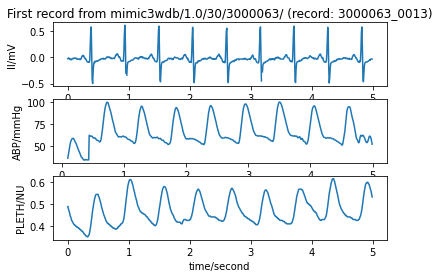

In [35]:
# plot the data loaded from this record
title_text = "First record from " + database_name + " (record: " + selected_record + ")"
wfdb.plot_wfdb(record=record_data, title=title_text, time_units='seconds') 

In [36]:
record_contains_signals_log = 'II,' in record_data.sig_name and 'PLETH,' in record_data.sig_name
if record_contains_signals_log:
    print('This record contains the required signals')
else:
    print('This record doesn\'t contain the required signals')

This record doesn't contain the required signals


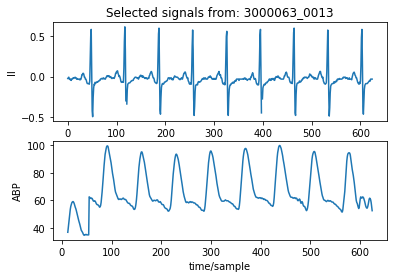

In [37]:
# plot just the signals of interest from this record
title_text = "Selected signals from: " + selected_record
wfdb.plot_items(signal=record_data.p_signal[:,0:2], title = title_text, ylabel = record_data.sig_name[0:2])